# 4-12. 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [25]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

diabetes=load_diabetes()

In [26]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [27]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [28]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
df_X = diabetes.data
df_y = diabetes.target

In [30]:
type(df_X)

numpy.ndarray

In [31]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [32]:
print(df_X.shape)

(442, 10)


In [33]:
np.save('df_X',df_X)

In [34]:
type(df_X)

numpy.ndarray

In [35]:
type(df_y)

numpy.ndarray

In [36]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
print(df_y.shape)

(442,)


In [38]:
np.save('df_y',df_y)

In [39]:
type(df_y)

numpy.ndarray

In [40]:
df_y.reshape(442,1)

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [49]:
X = diabetes.data
y = diabetes.target

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [43]:
W = np.random.rand(10)
b = np.random.rand()

In [44]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [45]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [46]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [47]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [48]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

IndexError: index 10 is out of bounds for axis 1 with size 10

In [ ]:
LEARNING_RATE = 0.0001

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b

프로젝트 회고

프로젝트 1 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자

먼저 필요한 라이브러리를 모두 임포트해 주었다.

당뇨병 데이터를 불러와서 key값을 확인하여 어떤 데이터들로 구성되어 있는지 확인하고 DESCR를 활용하여 데이터에 대한 정보를 확인하였다.

직접 회귀 모델을 설계하기 위하여 당뇨병의 진단기준에 대해 구글링을 하였고, 

데이터 중 s6값을 이용하여 직접 계산하는 1차함수를 만들어야하나라고 생각하다가 그 방법이 아닌가 확신이 들지 않았었다.

당뇨병 데이터가 numpy배열로 이루어져 있었고, 이에 판다스와 파이썬 문법이 헷갈려 코드를 작성하는 데 약간 헤맸다. 

문제에서 요구하는 대로 df_X와 df_y값을 설정하였고 dtype을 확인하였다. 

처음부터 ndarray였으나 다시한번 확인하는 의미로 ndarray를 바꿔주도록 했다. 

싸이킷런을 활용하여 데이터를 쪼개주었고 test사이즈는 이전과 같이 0.2로 설정하였다.

W와 b값을 구하는 것이 개념정리가 되지 않아서 어려웠다. 그러다가 그룹스터디를 통해 방법을 배울 수 있었다.

실습코드를 참고하여 MSE와 loss, gradient를 추출하는 코드를 작성하였다.

그라디언트를 추출하는 과정에서 오류메시지를 발견하였고 index 10 is out of bounds for axis 1 with size 10 을 해결하지 못하였다.

실습코드를 바탕으로 learning rate와, losses 값을 추출하는 코드를 작성해 보았으나 제대로 숙지하지 못하였다. 
위와 같은 오류가 발생하였다. 이에 시각화 그래프가 제대로 나오지 않았다.

전체적으로 개념에 대한 숙지가 조금 미비하고 필요에 따라 어떤 코드를 작성해야 하는지 알고 있으나 결과값을 도출해 내는 과정에서

오류 메시지를 해결하지 못하였다.

넘파이 배열에 대해 개인적으로 좀더 공부하였다.


# 4-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [51]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [52]:
train = train.copy()

In [53]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [54]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
type(train["datetime"])

pandas.core.series.Series

In [56]:
print(train["datetime"].dtypes)

object


In [57]:
train["datetime"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [58]:
train["datetime"] = pd.to_datetime(train['datetime'], infer_datetime_format=True)

In [59]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012


In [60]:
print(train["year"].dtypes)

int64


In [61]:
train['month'] = pd.DatetimeIndex(train['datetime']).month
train.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218,2012,12
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237,2012,12
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334,2012,12
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,12
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,2012,12
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12


In [62]:
train['day'] = pd.DatetimeIndex(train['datetime']).day
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [63]:
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [64]:
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0


In [65]:
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


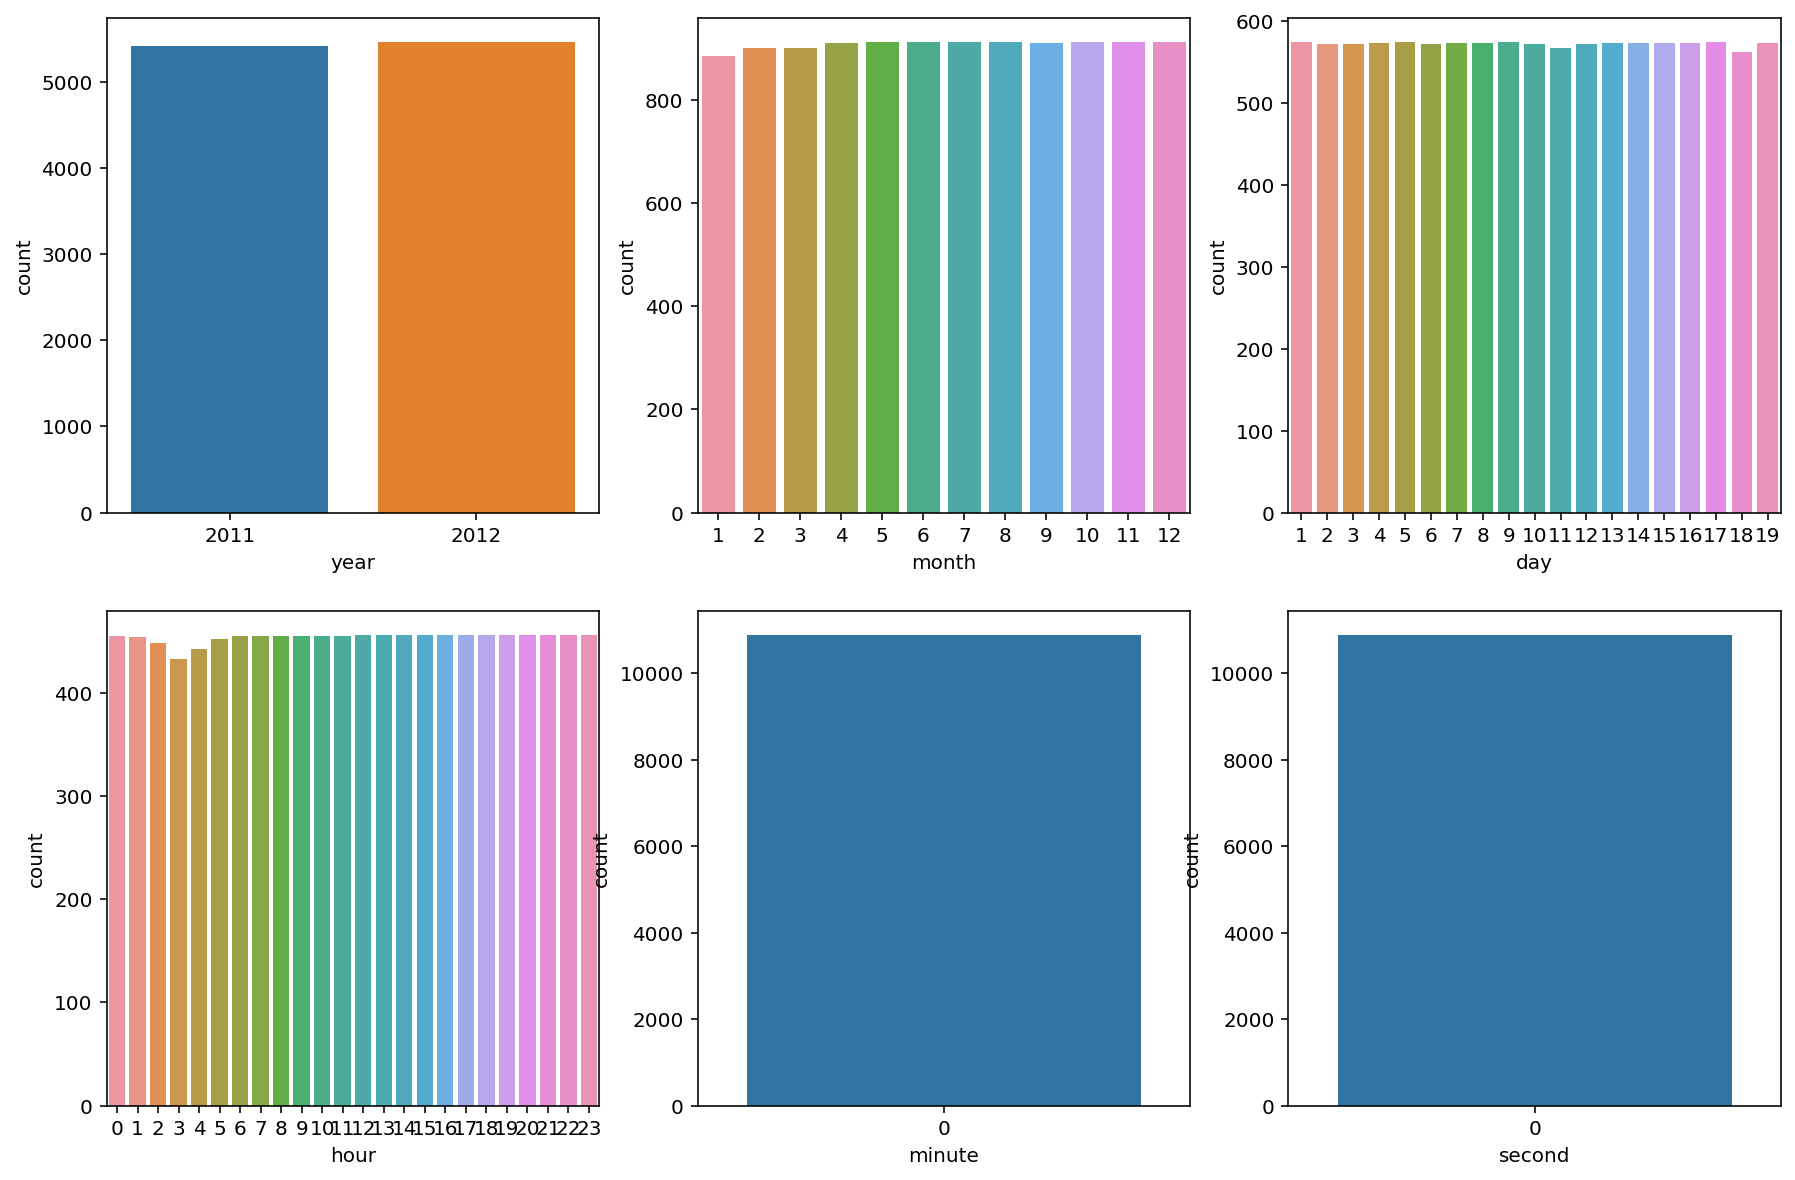

In [66]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x="year", data=train)

plt.subplot(2, 3, 2)
sns.countplot(x="month", data=train)

plt.subplot(2, 3, 3)
sns.countplot(x="day", data=train)

plt.subplot(2, 3, 4)
sns.countplot(x="hour", data=train)

plt.subplot(2, 3, 5)
sns.countplot(x="minute", data=train)

plt.subplot(2, 3, 6)
sns.countplot(x="second", data=train)

plt.show()

In [67]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [68]:
print(train.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64


In [69]:
train = train.drop(['casual','registered'], axis = 1)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0


In [70]:
df_X = train["temp"]
df_y = train["count"]

In [71]:
df_X

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [72]:
df_y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [73]:
X = train["temp"].values
y = train["count"].values

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708,) (8708,)
(2178,) (2178,)


In [75]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
pred = lin.predict(X_test)
mean_squared_error(y_test, pred)

ValueError: Expected 2D array, got 1D array instead:
array=[27.88 36.9  32.8  ... 11.48 15.58 22.14].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [76]:
def MSE(a,b):
    mse = ((a - b) ** 2).mean()
    return mse

In [77]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

필요한 라이브러리를 임포트하고, 데이터를 train에 넣어주었다.

원본 데이터를 손상시키지 않기 위해서 .copy()를 활용하여 다시 변수에 넣어주었다.

판다스로 불러온 데이터들의 column에 담긴 데이터 정보를 확인하였고, head를 통해 데이터를 간략하게 뽑아보았다.

문제의 요구조건인 daytime을 쪼개어 column으로 추가하기 위해 구글링을 통해 코드를 작성하였다. 

year month day... 순차적으로 콜룸을 합쳐주었다.

플롯하여 그래프를 뽑는 과정에서 subplot를 사용하는 방법이 미숙하였다. 코드를 작성하는 방법이 각각 달라서 혼란스러웠다.  
나는 그래프마다 하나하나 코드 작성하였고, subplot(행, 열, 번째)에 대한 내용을 다시 숙지하였다. 
화면에 맞추어 그래프의 figsize를 바꾸는 방법을 실습해 보았다.

이전 노드에서 학습한 대로 데이터의 결측치가 있는지에 대한 여부를 실행해 보았다.

결측치가 없었으나 실습코드를 연습삼아 작성해 보았다.

필요없는 columns casual과 registered를 drop을 통해서 없애주었다.

다양한 결과를 실험해 보기 위해 각 column을 X값에 대입하여 실험해보고자 하였으나 시간이 부족하여 문제에서 요구한 대로 temp를 X값에 넣었다.

싸이킷런을 통해 data를 split하였고,  선형회귀 코드를 작성하는 과정에서 오류가 발생하였다.
Expected 2D array, got 1D array instead:
array=[27.88 36.9  32.8  ... 11.48 15.58 22.14].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

배열의 차원이 달라서 결과값이 도출되지 않는다는 오류인데 해결하지 못했다.

MSE와 RMSE값을 도출하는 코드를 작성하였으나 결과값을 보지 못하였다. ㅠㅠ

